The dataset contains retrospective sample of males in a heart-disease high-risk region of the Western
Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many
of the CHD-positive men have undergone blood pressure reduction treatment and other programs to
reduce their risk factors after their CHD event. In some cases, the measurements were made after
these treatments. These data are taken from a larger dataset, described in Rousseauw et al. (1983),
South African Medical Journal. It is a tab separated file (csv) and contains the following columns
(source: http://www-stat.stanford.edu)
 sbp – Systolic blood pressure
 tobacco – Cumulative tobacco (kg)
 ldl – Low densiity lipoprotein cholesterol
 adiposity
 famhist – Family history of heart disease (Present, Absent)
 typea – Type-A behavior
 obesity
 alcohol – Current alcohol consumption
 age – Age at onset
 chd – Response, coronary heart disease
1. How many records are present in the dataset? Print the metadata information of the
dataset.
2. Draw a bar plot to show the number of persons having CHD or not in comparison to they
having
family history of the disease or not.
3. Does age have any correlation with sbp? Choose appropriate plot to show the
relationship.
4. Compare the distribution of tobacco consumption for persons having CHD and not having
CHD.
Can you interpret the effect of tobacco consumption on having coronary heart disease?
5. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to
show the
relationships.
6. Derive a new column called agegroup from age column where persons falling in different
age ranges
are categorized as below.
(0–15): young
(15–35): adults
(35–55): mid
(55–): old
7. Find out the number of CHD cases in different age categories. Do a barplot and sort them
in the
order of age groups.
8. Draw a box plot to compare distributions of ldl for different age groups.

In [1]:
# import all the necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

In [2]:
url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"
df = pd.read_csv(url)

In [3]:
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


1. How many records are present in the dataset? Print the metadata information of the dataset.

In [4]:
df.shape[0]

462

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [6]:
df.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [7]:
df.isnull().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [14]:
df.drop("row.names",axis=1,inplace=True)

In [58]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


2. Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not.

In [17]:
df.famhist.value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [18]:
df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [39]:
# plt.bar(df.famhist.value_counts())
# # plt.bar(df.chd.value_counts())
# plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [33]:
df.groupby(["chd","famhist"]).size()

chd  famhist
0    Absent     206
     Present     96
1    Absent      64
     Present     96
dtype: int64

<Axes: xlabel='chd,famhist'>

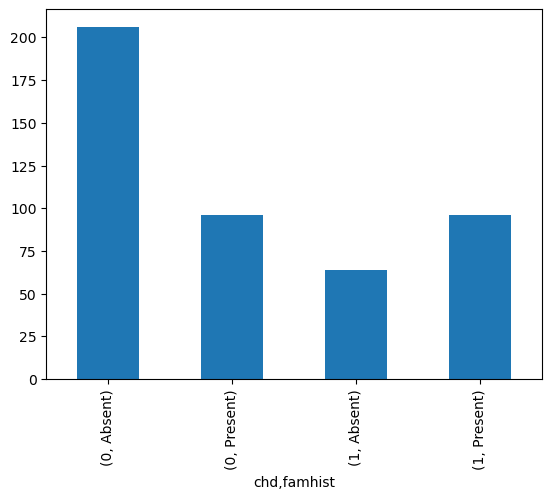

In [52]:
(df.groupby(["chd","famhist"]).size()).plot(kind="bar")

<Axes: xlabel='chd'>

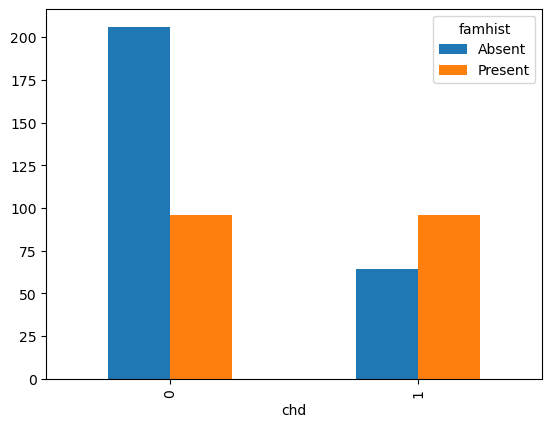

In [51]:
(df.groupby(["chd","famhist"]).size().unstack()).plot(kind="bar")

3. Does age have any correlation with sbp? Choose appropriate plot to show the relationship.

In [57]:
df[["sbp","age"]].corr()
# sns.heatmap(df[["sbp","age"]].corr())

,sbp,age
sbp,1.000000,0.388771
age,0.388771,1.000000


The correlation coefficient between SBP and age is 0.388771, which is a positive correlation. This means that as age increases, SBP tends to increase as well. The value of 0.388771 indicates a moderate positive correlation. 

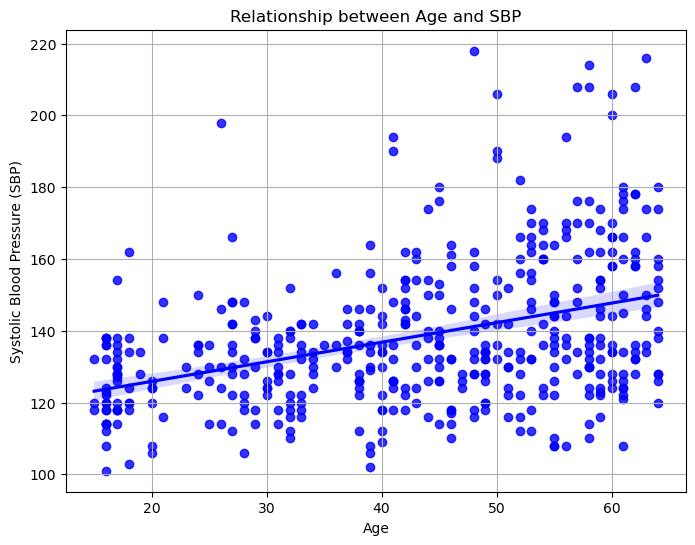

In [56]:
# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x="age", y="sbp", data=df, color='b')
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure (SBP)")
plt.title("Relationship between Age and SBP")
plt.grid(True)
plt.show()

4. Compare the distribution of tobacco consumption for persons having CHD and not having CHD. Can you interpret the effect of tobacco consumption on having coronary heart disease?

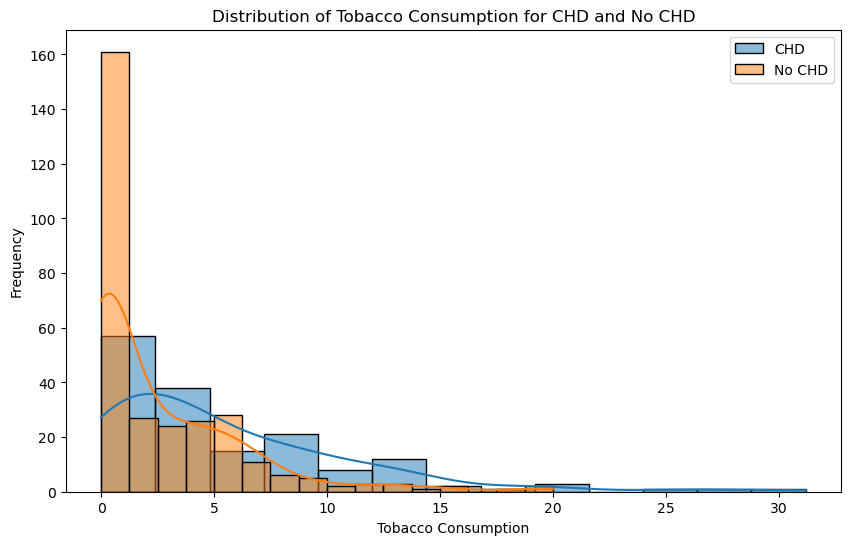

In [66]:
# df.groupby(["chd","tobacco"]).boxplot()
plt.figure(figsize=(10, 6))

# Plot the distribution of tobacco consumption for individuals with CHD
sns.histplot(df[df['chd'] == 1]['tobacco'], label='CHD', kde=True)

# Plot the distribution of tobacco consumption for individuals without CHD
sns.histplot(df[df['chd'] == 0]['tobacco'], label='No CHD', kde=True)

plt.xlabel("Tobacco Consumption")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Tobacco Consumption for CHD and No CHD")
plt.show()

In [67]:
# Calculate mean and median tobacco consumption for each group
mean_tobacco_chd = df[df['chd'] == 1]['tobacco'].mean()
median_tobacco_chd = df[df['chd'] == 1]['tobacco'].median()

mean_tobacco_no_chd = df[df['chd'] == 0]['tobacco'].mean()
median_tobacco_no_chd = df[df['chd'] == 0]['tobacco'].median()

print("Mean Tobacco Consumption for CHD:", mean_tobacco_chd)
print("Mean Tobacco Consumption for No CHD:", mean_tobacco_no_chd)

print("Median Tobacco Consumption for CHD:", median_tobacco_chd)
print("Median Tobacco Consumption for No CHD:", median_tobacco_no_chd)

Mean Tobacco Consumption for CHD: 5.524875
Mean Tobacco Consumption for No CHD: 2.6347350993377487
Median Tobacco Consumption for CHD: 4.13
Median Tobacco Consumption for No CHD: 1.0350000000000001


Individuals with CHD have a higher mean tobacco consumption (5.524875) compared to those without CHD (2.6347350993377487). This suggests that, on average, individuals with CHD tend to have higher levels of tobacco consumption.

5. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships.

In [76]:
df[['sbp', 'obesity', 'age', 'ldl']].corr()
# df[['sbp', 'obesity', 'age', 'ldl']].corr().plot(kind="bar")

,sbp,obesity,age,ldl
sbp,1.000000,0.238067,0.388771,0.158296
obesity,0.238067,1.000000,0.291777,0.330506
age,0.388771,0.291777,1.000000,0.311799
ldl,0.158296,0.330506,0.311799,1.000000


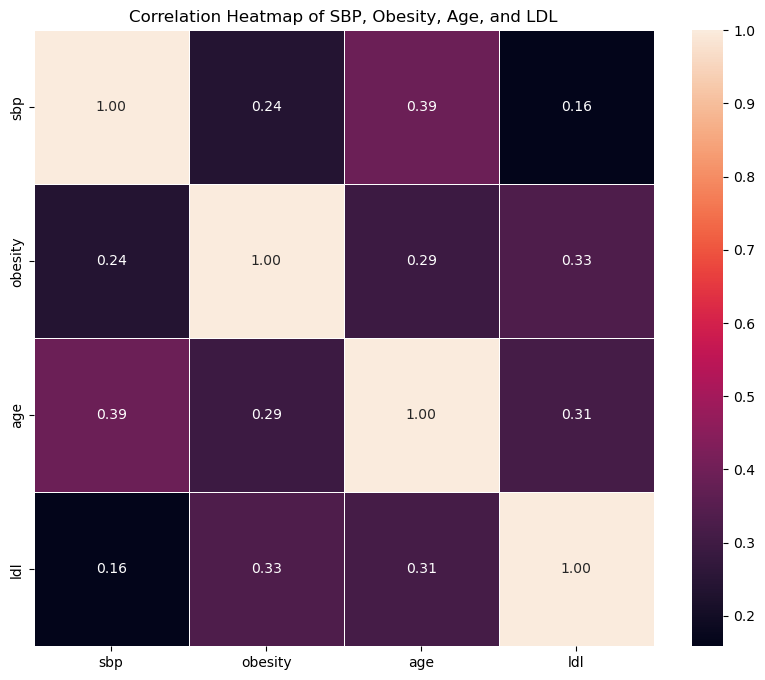

In [72]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['sbp', 'obesity', 'age', 'ldl']].corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of SBP, Obesity, Age, and LDL")
plt.show()

6. Derive a new column called agegroup from age column where persons falling in different age ranges are categorized as below. (0–15): young (15–35): adults (35–55): mid (55–): old

In [77]:
bins = [0, 15, 35, 55, float('inf')]  # Define the age ranges
labels = ['young', 'adults', 'mid', 'old']  # Corresponding labels for age groups

df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [78]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,mid


7. Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups.

In [81]:
df.groupby(["chd","agegroup"]).size()

chd  agegroup
0    young         0
     adults      125
     mid         118
     old          59
1    young         0
     adults       18
     mid          71
     old          71
dtype: int64

In [82]:
df[df['chd'] == 1].groupby('agegroup').size()

agegroup
young      0
adults    18
mid       71
old       71
dtype: int64

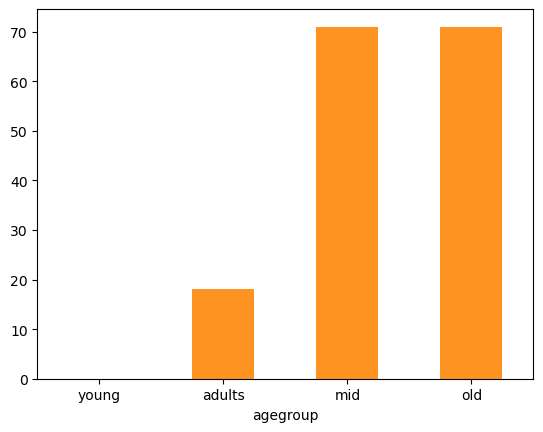

In [91]:
df[df['chd'] == 1].groupby('agegroup').size().plot(kind="bar", color='#FF9322')
plt.xticks(rotation=0)
plt.show()

8. Draw a box plot to compare distributions of ldl for different age groups.

<Axes: >

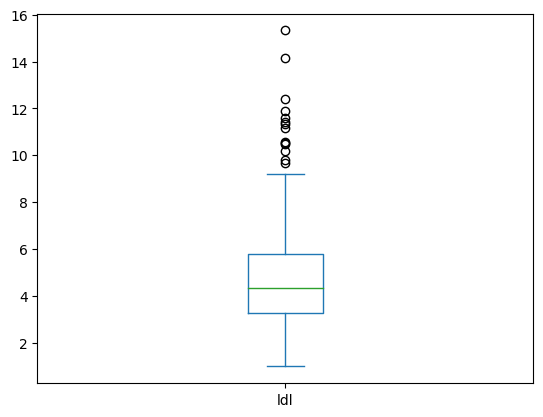

In [94]:
df.ldl.plot(kind="box")

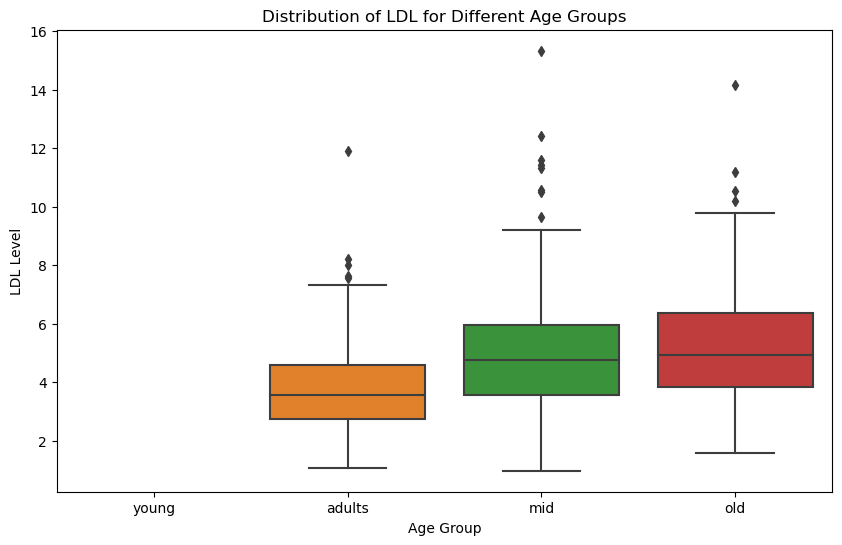

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='agegroup', y='ldl', data=df, order=['young', 'adults', 'mid', 'old'])
plt.xlabel("Age Group")
plt.ylabel("LDL Level")
plt.title("Distribution of LDL for Different Age Groups")
plt.show()